In [11]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_squared_log_error
import tensorflow as tf

In [12]:
df = pd.read_csv('/content/ACB.VN-BaoCao.csv')

In [13]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-03-01,8533.238281,8619.142578,8447.333008,8590.507813,8254.484375,5164405.0
1,2019-03-04,8590.507813,8733.682617,8561.873047,8705.047852,8364.543945,10898750.0
2,2019-03-05,8705.047852,8790.953125,8619.142578,8676.413086,8337.029297,8611453.0
3,2019-03-06,8647.778320,8705.047852,8590.507813,8676.413086,8337.029297,11100248.0
4,2019-03-07,8705.047852,8790.953125,8676.413086,8733.682617,8392.058594,11530669.0


In [14]:
df = df[['Close']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index

# Train test 8:2

In [15]:
# Split data into train and test sets
train_size = int(len(df) * 0.8)
train_data, test_data = df[:train_size], df[train_size:]

In [16]:
X_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])
X_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])

In [17]:
X_train, y_train

(array([[   0],
        [   1],
        [   2],
        ...,
        [1047],
        [1048],
        [1049]]),
 array([ 8590.507813,  8705.047852,  8676.413086, ..., 18827.976563,
        18903.591797, 18865.785156]))

In [18]:
# Build and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
print("Predictions:", y_pred.flatten())



Predictions: [21596.56951487 21610.25409634 21623.93867781 21637.62325928
 21651.30784075 21664.99242222 21678.67700369 21692.36158516
 21706.04616663 21719.73074809 21733.41532956 21747.09991103
 21760.7844925  21774.46907397 21788.15365544 21801.83823691
 21815.52281838 21829.20739985 21842.89198132 21856.57656279
 21870.26114426 21883.94572573 21897.6303072  21911.31488867
 21924.99947013 21938.6840516  21952.36863307 21966.05321454
 21979.73779601 21993.42237748 22007.10695895 22020.79154042
 22034.47612189 22048.16070336 22061.84528483 22075.5298663
 22089.21444777 22102.89902924 22116.58361071 22130.26819218
 22143.95277364 22157.63735511 22171.32193658 22185.00651805
 22198.69109952 22212.37568099 22226.06026246 22239.74484393
 22253.4294254  22267.11400687 22280.79858834 22294.48316981
 22308.16775128 22321.85233275 22335.53691422 22349.22149568
 22362.90607715 22376.59065862 22390.27524009 22403.95982156
 22417.64440303 22431.3289845  22445.01356597 22458.69814744
 22472.38272

In [19]:
last_index = df.index[-1]

# Create arrays of consecutive integers for the next 90 days
x_next_90_days = np.array(range(last_index + 1, last_index + 91)).reshape(-1, 1)
y_next_90_days = model.predict(x_next_90_days)



In [20]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_squared_log_error
# Calculating test metrics
mape_test = mean_absolute_percentage_error(y_test, y_pred)
mae_test = mean_absolute_error(y_test, y_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))
msle_test = mean_squared_log_error(y_test, y_pred)

# Print result
print('---------TEST----------')
print("MAPE:", round(mape_test, 3))
print("MAE:", round(mae_test, 3))
print("RMSE:", round(rmse_test, 3))
print("MSLE:", round(msle_test, 3))
print('-------------------')

---------TEST----------
MAPE: 0.117
MAE: 2320.709
RMSE: 2682.869
MSLE: 0.016
-------------------


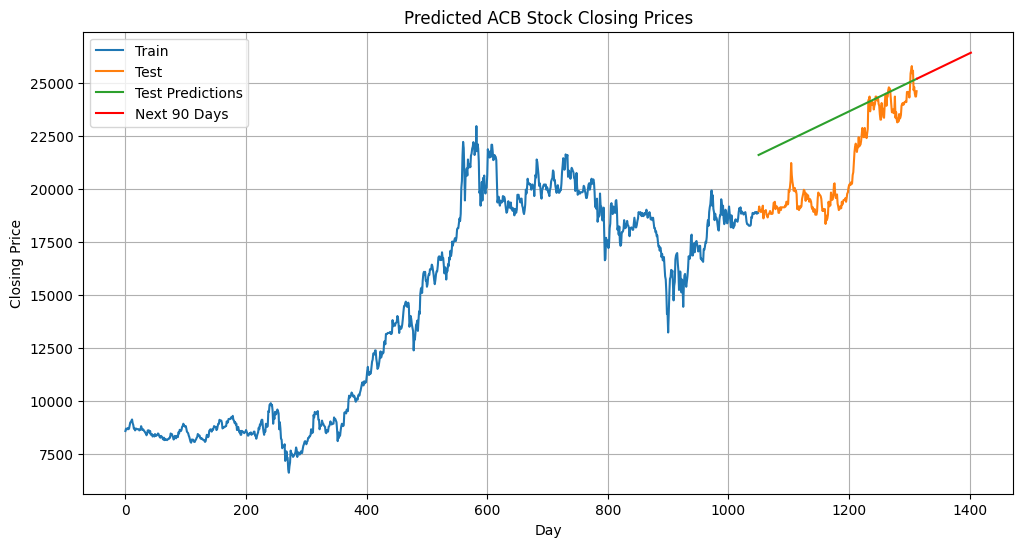

In [21]:
plt.figure(figsize=(12,6))

# Plot the train, test, and validation data
plt.plot(train_data.index, train_data['Close'], label='Train')
plt.plot(test_data.index, test_data['Close'], label='Test')

# Plot the predictions for test and validation sets
plt.plot(test_data.index, y_pred, label='Test Predictions')

# Plot the predictions for the next 90 days

plt.plot(range(last_index + 1, last_index + 91), y_next_90_days, label='Next 90 Days', color='red')

# Adding titles and labels
plt.title('Predicted ACB Stock Closing Prices')
plt.xlabel('Day')
plt.ylabel('Closing Price')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

# Train test 7:3

In [22]:
df = pd.read_csv('/content/ACB.VN-BaoCao.csv')

In [23]:
df = df[['Close']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index

In [24]:
# Split data into train and test sets
train_size = int(len(df) * 0.7)
train_data, test_data = df[:train_size], df[train_size:]

In [25]:
X_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])

In [26]:
X_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])

# Build and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
print("Predictions:", y_pred.flatten())



Predictions: [21496.86278835 21513.39113511 21529.91948187 21546.44782863
 21562.97617539 21579.50452215 21596.03286891 21612.56121566
 21629.08956242 21645.61790918 21662.14625594 21678.6746027
 21695.20294946 21711.73129622 21728.25964298 21744.78798974
 21761.3163365  21777.84468326 21794.37303002 21810.90137678
 21827.42972354 21843.9580703  21860.48641706 21877.01476382
 21893.54311058 21910.07145734 21926.5998041  21943.12815086
 21959.65649762 21976.18484438 21992.71319114 22009.2415379
 22025.76988466 22042.29823142 22058.82657818 22075.35492494
 22091.88327169 22108.41161845 22124.93996521 22141.46831197
 22157.99665873 22174.52500549 22191.05335225 22207.58169901
 22224.11004577 22240.63839253 22257.16673929 22273.69508605
 22290.22343281 22306.75177957 22323.28012633 22339.80847309
 22356.33681985 22372.86516661 22389.39351337 22405.92186013
 22422.45020689 22438.97855365 22455.50690041 22472.03524717
 22488.56359393 22505.09194069 22521.62028745 22538.14863421
 22554.676980

In [27]:
last_index = df.index[-1]

# Create arrays of consecutive integers for the next 90 days
x_next_90_days = np.array(range(last_index + 1, last_index + 91)).reshape(-1, 1)
y_next_90_days = model.predict(x_next_90_days)



In [28]:
from sklearn.metrics import mean_absolute_error

# Calculating test metrics
mape_test = mean_absolute_percentage_error(y_test, y_pred)
mae_test = mean_absolute_error(y_test, y_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))
msle_test = mean_squared_log_error(y_test, y_pred)

# Print result
print('---------TEST----------')
print("MAPE:", round(mape_test, 3))
print("MAE:", round(mae_test, 3))
print("RMSE:", round(rmse_test, 3))
print("MSLE:", round(msle_test, 3))
print('-------------------')

---------TEST----------
MAPE: 0.241
MAE: 4679.671
RMSE: 4812.948
MSLE: 0.049
-------------------


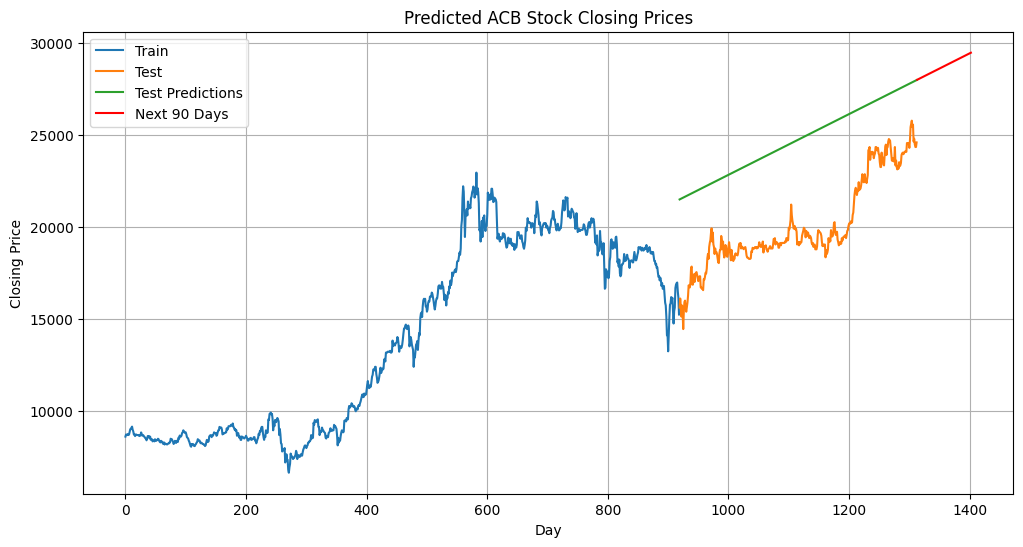

In [29]:
plt.figure(figsize=(12,6))

# Plot the train, test, and validation data
plt.plot(train_data.index, train_data['Close'], label='Train')
plt.plot(test_data.index, test_data['Close'], label='Test')

# Plot the predictions for test and validation sets
plt.plot(test_data.index, y_pred, label='Test Predictions')

# Plot the predictions for the next 90 days

plt.plot(range(last_index + 1, last_index + 91), y_next_90_days, label='Next 90 Days', color='red')

# Adding titles and labels
plt.title('Predicted ACB Stock Closing Prices')
plt.xlabel('Day')
plt.ylabel('Closing Price')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

# Train test 9:1

In [30]:
df = pd.read_csv('/content/ACB.VN-BaoCao.csv')

In [31]:
df = df[['Close']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index

In [32]:
# Split data into train and test sets
train_size = int(len(df) * 0.9)
train_data, test_data = df[:train_size], df[train_size:]

In [33]:
X_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])

In [34]:
X_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])

# Build and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
print("Predictions:", y_pred.flatten())



Predictions: [22088.75337285 22100.83327389 22112.91317493 22124.99307597
 22137.07297701 22149.15287805 22161.23277909 22173.31268013
 22185.39258117 22197.47248221 22209.55238325 22221.63228429
 22233.71218533 22245.79208637 22257.87198741 22269.95188845
 22282.03178949 22294.11169053 22306.19159157 22318.27149261
 22330.35139365 22342.43129469 22354.51119573 22366.59109677
 22378.67099781 22390.75089885 22402.83079989 22414.91070093
 22426.99060197 22439.07050301 22451.15040405 22463.23030509
 22475.31020613 22487.39010717 22499.47000821 22511.54990925
 22523.62981029 22535.70971133 22547.78961237 22559.86951341
 22571.94941445 22584.02931549 22596.10921653 22608.18911757
 22620.26901861 22632.34891965 22644.42882069 22656.50872173
 22668.58862277 22680.66852381 22692.74842485 22704.82832589
 22716.90822693 22728.98812797 22741.06802901 22753.14793005
 22765.22783109 22777.30773213 22789.38763317 22801.46753421
 22813.54743525 22825.62733629 22837.70723733 22849.78713837
 22861.8670

In [35]:
last_index = df.index[-1]

# Create arrays of consecutive integers for the next 90 days
x_next_90_days = np.array(range(last_index + 1, last_index + 91)).reshape(-1, 1)
y_next_90_days = model.predict(x_next_90_days)



In [36]:
from sklearn.metrics import mean_absolute_error

# Calculating test metrics
mape_test = mean_absolute_percentage_error(y_test, y_pred)
mae_test = mean_absolute_error(y_test, y_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))
msle_test = mean_squared_log_error(y_test, y_pred)

# Print result
print('---------TEST----------')
print("MAPE:", round(mape_test, 3))
print("MAE:", round(mae_test, 3))
print("RMSE:", round(rmse_test, 3))
print("MSLE:", round(msle_test, 3))
print('-------------------')

---------TEST----------
MAPE: 0.053
MAE: 1158.013
RMSE: 1454.617
MSLE: 0.004
-------------------


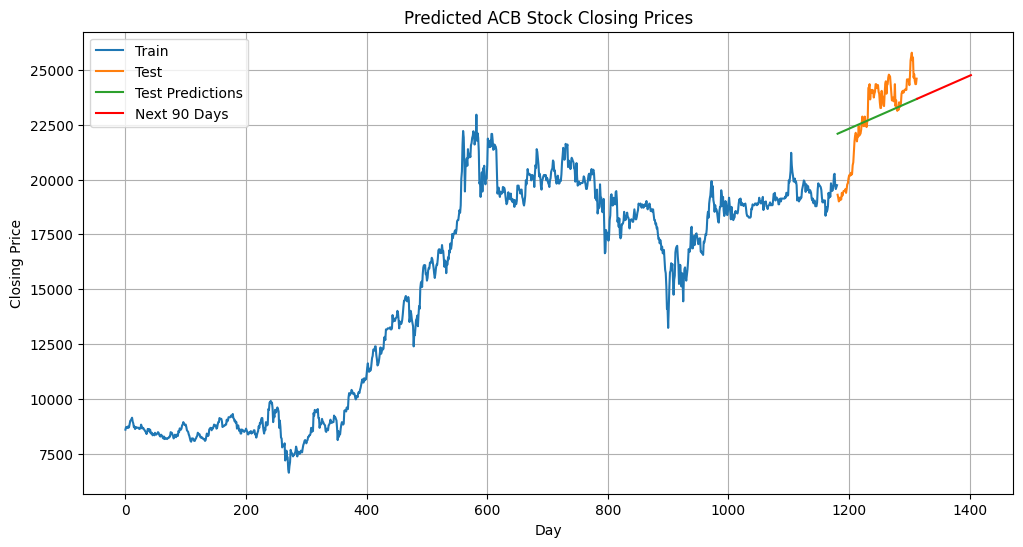

In [37]:
plt.figure(figsize=(12,6))

# Plot the train, test, and validation data
plt.plot(train_data.index, train_data['Close'], label='Train')
plt.plot(test_data.index, test_data['Close'], label='Test')

# Plot the predictions for test and validation sets
plt.plot(test_data.index, y_pred, label='Test Predictions')

# Plot the predictions for the next 90 days

plt.plot(range(last_index + 1, last_index + 91), y_next_90_days, label='Next 90 Days', color='red')

# Adding titles and labels
plt.title('Predicted ACB Stock Closing Prices')
plt.xlabel('Day')
plt.ylabel('Closing Price')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()